In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='age', ylabel='sex'>

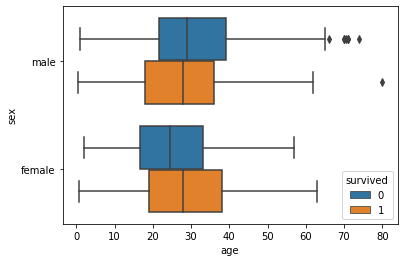

In [6]:
sns.boxplot(x='age',y='sex',data=df)

<AxesSubplot:xlabel='sex', ylabel='age'>

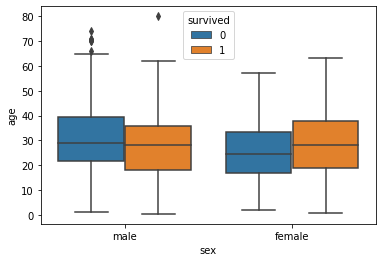

In [9]:
sns.boxplot(x='sex',y='age',hue='survived',data=df)

In [37]:
df1=df[['age','sex']]
df1

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


In [38]:
nc=['age']
for col in nc:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1[col] = np.where((df1[col] < lower_bound) | (df1[col] > upper_bound), df[col].median(), df1[col])
print(df1)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)

      age     sex
0    22.0    male
1    38.0  female
2    26.0  female
3    35.0  female
4    35.0    male
..    ...     ...
886  27.0    male
887  19.0  female
888   NaN  female
889  26.0    male
890  32.0    male

[891 rows x 2 columns]
Q1 20.125
Q3 38.0
IQR 17.875


/tmp/ipykernel_4475/2346588457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = np.where((df1[col] < lower_bound) | (df1[col] > upper_bound), df[col].median(), df1[col])


In [40]:
df1

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


In [64]:
df_m=df1[df1['sex']=='male']
df_m

,age,sex
0,22.0,male
4,35.0,male
5,NaN,male
6,54.0,male
7,2.0,male
...,...,...
883,28.0,male
884,25.0,male
886,27.0,male
889,26.0,male


In [65]:
nc=['age']
for col in nc:
    Q1 = df_m[col].quantile(0.25)
    Q3 = df_m[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_m[col] = np.where((df_m[col] < lower_bound) | (df_m[col] > upper_bound), df_m[col].median(), df_m[col])
print(df_m)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)

      age   sex
0    22.0  male
4    35.0  male
5     NaN  male
6    54.0  male
7     2.0  male
..    ...   ...
883  28.0  male
884  25.0  male
886  27.0  male
889  26.0  male
890  32.0  male

[577 rows x 2 columns]
Q1 21.0
Q3 37.0
IQR 16.0


/tmp/ipykernel_4475/2907098192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m[col] = np.where((df_m[col] < lower_bound) | (df_m[col] > upper_bound), df_m[col].median(), df_m[col])


In [66]:
df_f=df1[df1['sex']=='female']
df_f

,age,sex
1,38.0,female
2,26.0,female
3,35.0,female
8,27.0,female
9,14.0,female
...,...,...
880,25.0,female
882,22.0,female
885,39.0,female
887,19.0,female


In [67]:
nc=['age']
for col in nc:
    Q1f = df_f[col].quantile(0.25)
    Q3f = df_f[col].quantile(0.75)
    IQRf = Q3 - Q1
    lower_bound = Q1f - 1.5 * IQRf
    upper_bound = Q3f + 1.5 * IQRf
    df_f[col] = np.where((df_f[col] < lower_bound) | (df_f[col] > upper_bound), df_f[col].median(), df_f[col])
print(df_f)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)

      age     sex
1    38.0  female
2    26.0  female
3    35.0  female
8    27.0  female
9    14.0  female
..    ...     ...
880  25.0  female
882  22.0  female
885  39.0  female
887  19.0  female
888   NaN  female

[314 rows x 2 columns]
Q1 21.0
Q3 37.0
IQR 16.0


/tmp/ipykernel_4475/428086007.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[col] = np.where((df_f[col] < lower_bound) | (df_f[col] > upper_bound), df_f[col].median(), df_f[col])


<AxesSubplot:xlabel='sex', ylabel='age'>

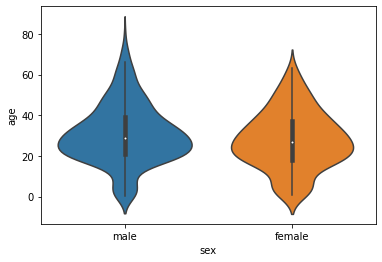

In [68]:
sns.violinplot(x='sex', y='age', data=df)

/home/student/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

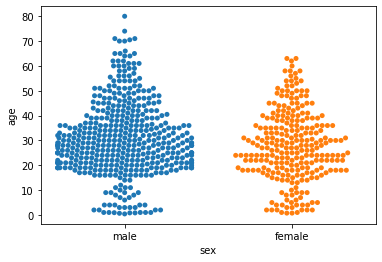

In [60]:
sns.swarmplot(x='sex', y='age', data=df)

<AxesSubplot:xlabel='sex', ylabel='age'>

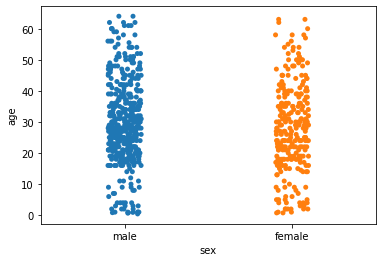

In [63]:
sns.stripplot(x='sex', y='age', data=df1)